# `regression.XGBoostCVRegressor`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0


In [19]:
from slickml.regression import XGBoostCVRegressor

help(XGBoostCVRegressor)

Help on class XGBoostCVRegressor in module slickml.regression._xgboostcv:

class XGBoostCVRegressor(slickml.regression._xgboost.XGBoostRegressor)
 |  XGBoostCVRegressor(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict[str, Union[str, float, int]]] = None, n_splits: Optional[int] = 4, metrics: Optional[str] = 'rmse', early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Regressor.
 |  
 |  This is wrapper using ``XGBoostRegressor`` to train a XGBoost [xgboost-api]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based on the best number of boosting round to avoid ov

### Example 1: `XGBoostCVRegressor` model for `california-housing` data set

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
)

In [5]:
# custom params
params = {
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
reg = XGBoostCVRegressor(
    n_splits=10,
    num_boost_round=3000,
    metrics="rmsle",
    params=params,
)
reg.fit(X_train, y_train)

*-* Best Boosting Round = 2517 -*- 10-Folds CV RMSLE: Train = 0.132 +/- 0.000 -*- Test = 0.147 +/- 0.003 *-*


In [6]:
# cv results or (reg.cv_results_)
reg.get_cv_results()

,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,0.712159,0.001127,0.712096,0.010188
1,0.685592,0.001134,0.685545,0.010062
2,0.660229,0.001133,0.660189,0.009926
3,0.636021,0.001110,0.635995,0.009823
4,0.612976,0.001093,0.612956,0.009688
...,...,...,...,...
2513,0.131870,0.000311,0.147472,0.002818
2514,0.131864,0.000311,0.147468,0.002813
2515,0.131860,0.000311,0.147468,0.002812
2516,0.131854,0.000310,0.147465,0.002811


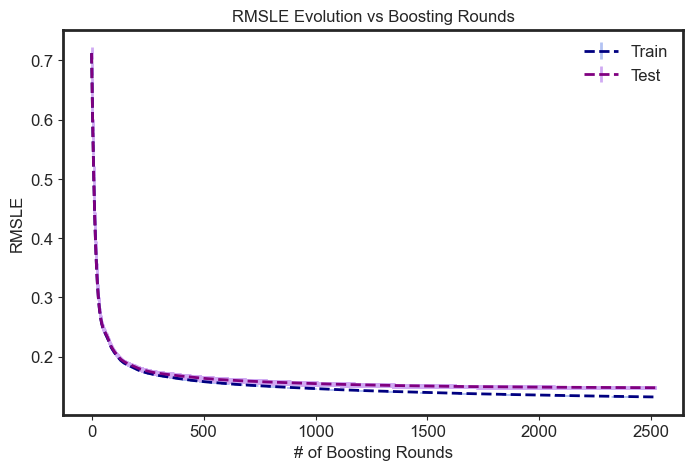

In [7]:
# plot cv results
reg.plot_cv_results()

In [8]:
# feature importrance (reg.get_feature_importance())
reg.feature_importance_

,feature,total_gain
0,F_0,96511.218750
1,F_6,24524.949219
2,F_5,17814.699219
3,F_7,15886.217773
4,F_1,4068.790039
5,F_2,3427.291992
6,F_3,1424.070923
7,F_4,1194.258423


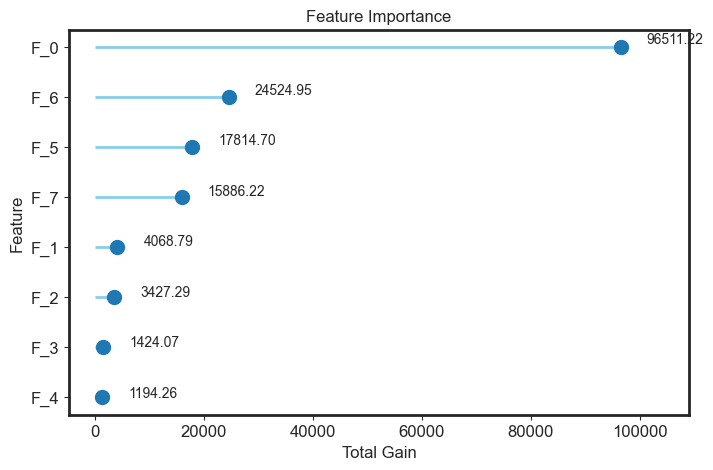

In [9]:
# plot feature importance
reg.plot_feature_importance()

In [10]:
# pred target values (or reg.y_pred_)
y_pred = reg.predict(X_test)
y_pred[:10]

array([3.6514165, 1.7565024, 1.6333787, 4.173333 , 1.4916401, 1.9856935,
       3.123313 , 0.5786147, 2.8224545, 0.9631794], dtype=float32)

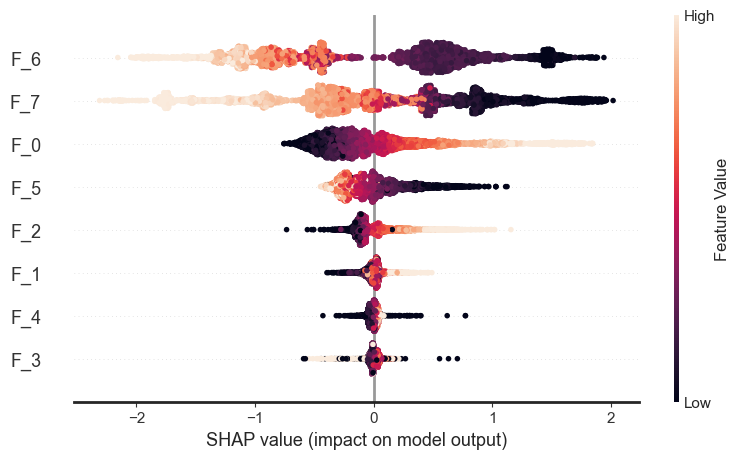

In [11]:
# shap summary plot of validation set
reg.plot_shap_summary(validation=True)

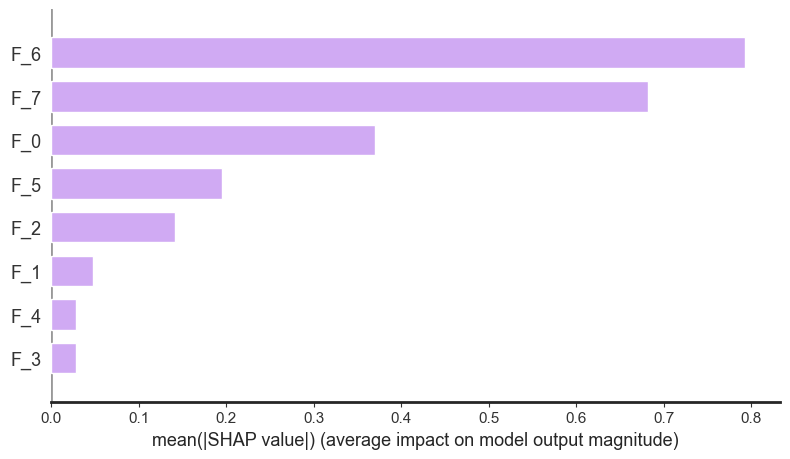

In [12]:
# shap summary bar plot of validation set
reg.plot_shap_summary(plot_type="bar")

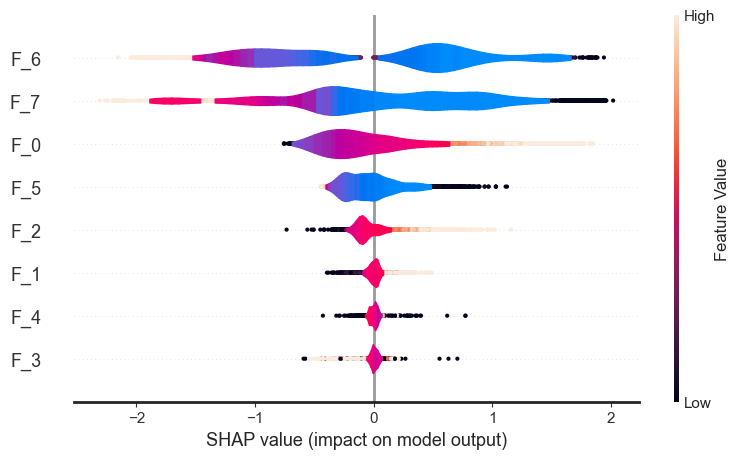

In [13]:
# shap summary plot (violin)
reg.plot_shap_summary(plot_type="violin")

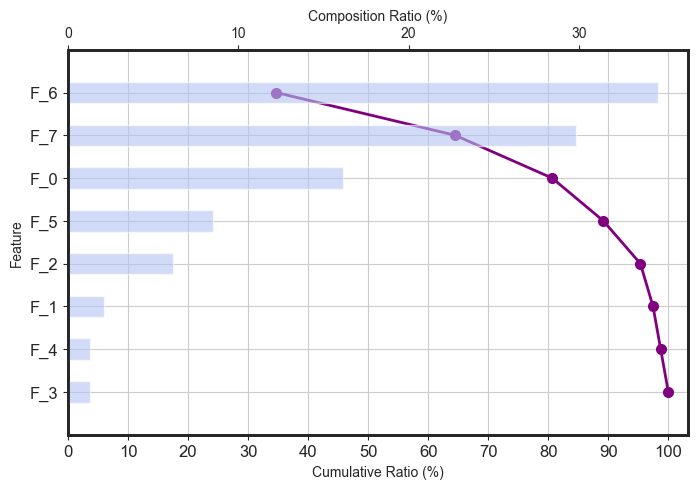

In [14]:
# plot shap waterfall plot
reg.plot_shap_waterfall()

In [15]:
# model's fitting params (or reg.params)
reg.get_params()

{'eval_metric': 'rmse',
 'tree_method': 'hist',
 'objective': 'reg:squarederror',
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1,
 'gamma': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'subsample': 0.9,
 'max_delta_step': 1,
 'verbosity': 0,
 'nthread': 4}

In [16]:
reg.model_

## You can use the `RegressionMetrics` class to evaluate your model

In [17]:
from slickml.metrics import RegressionMetrics

metrics = RegressionMetrics(y_test, y_pred)

,R2 Score,Explained Variance Score,Mean Absolute Error,Mean Squared Error,Mean Squared Log Error,Mean Absolute Percentage Error,REC AUC,Coeff. of Variation,Mean of Variation
Metrics,0.821000,0.821000,0.334000,0.240000,0.022000,0.186000,0.869000,0.286000,1.052000


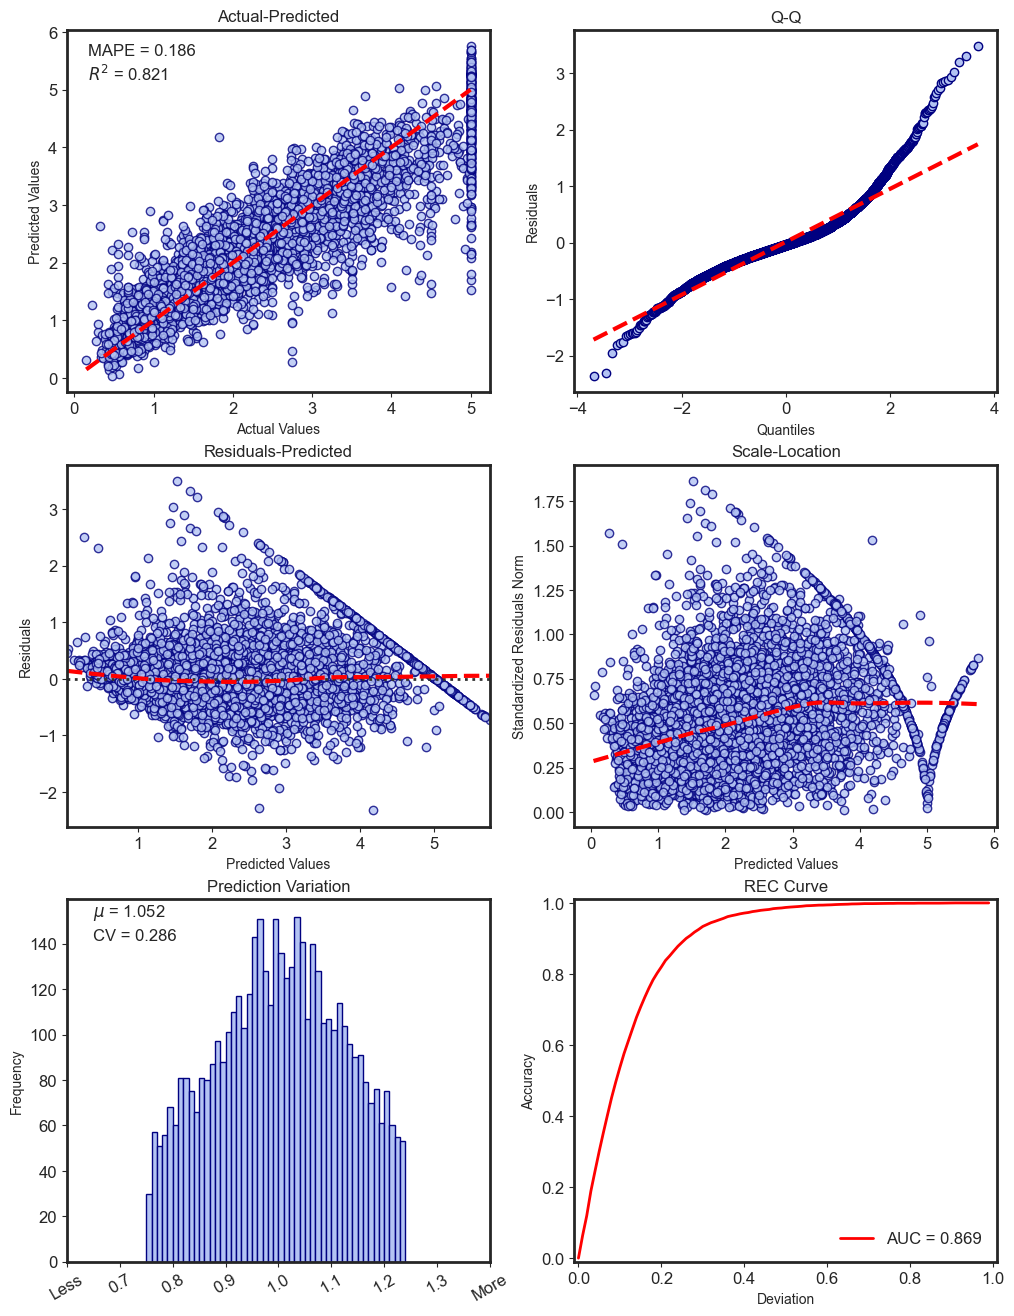

In [18]:
metrics.plot()

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).